# Homework 2: Problems
## Due Friday 26 October

### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1  (50 points)
On Data Camp:

Statistical Thinking in Python (Part 2): Bootstrap confidence intervals 

This is Chapter 2.  You shouldn't need Chapter 1, but you are welcome to do it.  If this chapter interests you, then you might get something out of completing Chapters 3 and 4 as well.

## Problem 2 (25 points)
Repeat the simple MLE example from class (Inference2.ipynb), but with 2 changes.  First allow for a variable number of data points (and show for `N=3` and `N=10`.  Second, limit the range of valid solutions for $\mu$ to $\mu>1.1$ (just for `N=10`).  How does that affect your results?  Use a random seed of 42 for all.


## Problem 3 (25 points)

Produce the "trace" plot for the clear/cloudy day problem from Inference2.ipynb.  Then plot the histogram of that trace, throwing away steps in the trace that could be considered part of the burn-in.  Your plots should look like the ones from class (or nicer!).  Confirm that you get the same answer for day $N$ as day $N+1$ and it doesn't matter whether is was clear or cloudy on the day that you started. 

## Problem 2 Solution

[1.09934283 0.97234714 1.12953771]


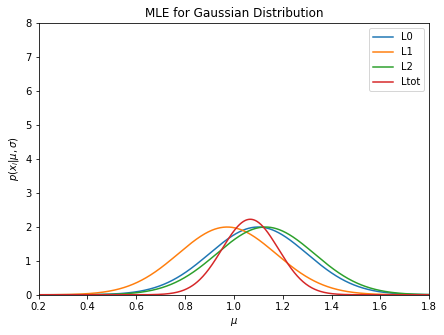

In [22]:
#This is for part 1 with N= 3
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline
np.random.seed(42)

N = 3
K = 1000
mu = 1
sigma = .2 
sample = norm(mu,sigma).rvs(N)
print(sample)

#Make the plot and see if you get the same as me.
L = []
muGrid = np.linspace(0,2,K)
for i in range(N):
    L.append(norm.pdf(muGrid,loc=sample[i],scale=sigma))

#print(L)
Ltot = np.ones(K)
#print(Ltot)
for k in range(N):
    Ltot *= L[k]
#print(Ltot)

fig, ax = plt.subplots(figsize=(7, 5))
for j in range(N):
    plt.plot(muGrid,L[j],ls='-',label="L{}".format(j))
    
plt.plot(muGrid,Ltot/N,ls='-',label="Ltot")

plt.xlim(0.2, 1.8)
plt.ylim(0, 8.0)
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')
plt.legend()

[1.09934283 0.97234714 1.12953771 1.30460597 0.95316933 0.95317261
 1.31584256 1.15348695 0.90610512 1.10851201]


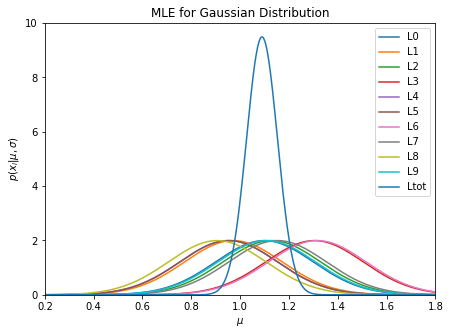

In [32]:
#This is for part 1 with N=10
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline
np.random.seed(42)

N = 10
K = 1000
mu = 1
sigma = .2 
sample = norm(mu,sigma).rvs(N)
print(sample)

#Make the plot and see if you get the same as me.
L = []
muGrid = np.linspace(0,2,K)
for i in range(N):
    L.append(norm.pdf(muGrid,loc=sample[i],scale=sigma))

#print(L)
Ltot = np.ones(K)
#print(Ltot)
for k in range(N):
    Ltot *= L[k]
#print(Ltot)

fig, ax = plt.subplots(figsize=(7, 5))
for j in range(N):
    plt.plot(muGrid,L[j],ls='-',label="L{}".format(j))
    
plt.plot(muGrid,Ltot/N,ls='-',label="Ltot")

plt.xlim(0.2, 1.8)
plt.ylim(0, 10.0)
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')
plt.legend()

[1.09934283 0.97234714 1.12953771 1.30460597 0.95316933 0.95317261
 1.31584256 1.15348695 0.90610512 1.10851201]


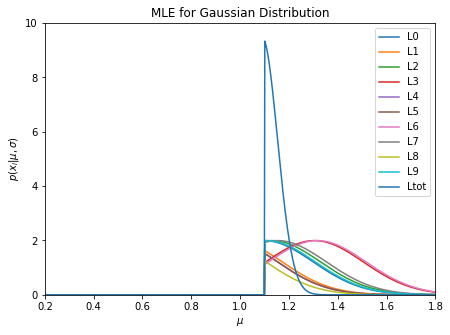

In [40]:
#This is for part 2 with N= 10 and the variable mu
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
%matplotlib inline
np.random.seed(42)

N = 10
K = 1000
mu = 1
sigma = .2 
sample = norm(mu,sigma).rvs(N)
print(sample)

L = []
muGrid = np.linspace(0,2,K)
for i in range(N):
    trial = norm.pdf(muGrid,loc=sample[i],scale=sigma)
    trial[np.where(muGrid <= mu+.1)] = 0
    L.append(trial)

#print(L)
Ltot = np.ones(K)
#print(Ltot)
for k in range(N):
    Ltot *= L[k]
#print(Ltot)

fig, ax = plt.subplots(figsize=(7, 5))
for j in range(N):
    plt.plot(muGrid,L[j],ls='-',label="L{}".format(j))
    
plt.plot(muGrid,Ltot/N,ls='-',label="Ltot")

plt.xlim(0.2, 1.8)
plt.ylim(0, 10.0)
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')
plt.legend()

## Problem 3 Solution

Starting on a clear day:

Probability of a Clear Day at day N + 1:  0.8267
Probability of a Clear Day at day N:  0.8266826682668267
Probability of a Cloudy Day at day N + 1:  0.1733
Probability of a Cloudy Day at day N:  0.17331733173317332


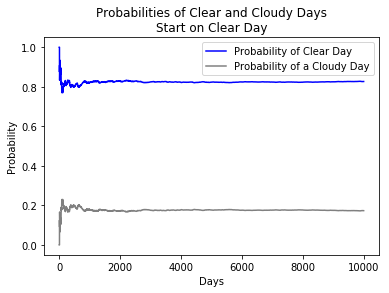

Starting on a cloudy day:

Probability of a Clear Day at day N + 1:  0.8344
Probability of a Clear Day at day N:  0.8344834483448345
Probability of a Cloudy Day at day N + 1:  0.16559999999999997
Probability of a Cloudy Day at day N:  0.16551655165516554


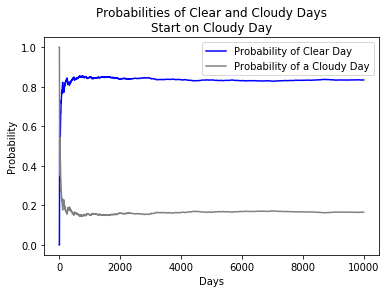

In [10]:
#producing a trace plot of a MCMC simulation

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

N = 10000 #number of days in simulation
x = np.arange(N)
start = np.array(['clear', 'cloudy']) #set this up as an array to perform a loop to determine that it does not matter what type of day you start on
np.random.seed(42)

for i in range(len(start)):
    print("Starting on a",start[i], "day:\n")
    #initialize arrays that will store clear and cloudy days as 0s and 1s
    p_clear = []
    p_cloudy = []
    #initialize arrays that will store each day as clear and cloudy as 1s and 0s respectively
    day = []
    #start with initial probabilities and enter first day into arrays set up above
    if start[i] == 'clear': #first day is clear
        p_clear.append(1.0)
        p_cloudy.append(0)
        day.append(1)
    if start[i] == 'cloudy': #first day is cloudy
        p_clear.append(0)
        p_cloudy.append(1.0)
        day.append(0)
        
    #start main MCMC loop starting on day one because day zero is determined above
    for j in range(1,N,1):
        #get a random number
        rando = np.random.uniform(0,1.0)
        #start decision tree like structure with if else ifs
        if day[j-1] == 1: #if today is clear 
            if rando < .1: #condition for cloudy tomorrow
                day.append(0)
            if rando > .1: #condition for clear tomorrow
                day.append(1)
                
        elif day[j-1] == 0: #if today cloudy
            if rando < .5: #condition for cloudy tomorrow
                day.append(0)
            if rando > .5: #condition for clear tomorrow
                day.append(1)
        #add new probabilities
        p_clear.append(np.sum(day)/len(day))
        p_cloudy.append(1 - np.sum(day)/len(day))
    
    #print final probabilities of either day
    print("Probability of a Clear Day at day N + 1: ",p_clear[-1])
    print("Probability of a Clear Day at day N: ",p_clear[-2])
    print("Probability of a Cloudy Day at day N + 1: ",p_cloudy[-1])
    print("Probability of a Cloudy Day at day N: ",p_cloudy[-2])
    
    #plot each
    if i == 0:
        plt.plot(x,p_clear,'-',label='Probability of Clear Day',color='blue')
        plt.plot(x,p_cloudy,'-',label='Probability of a Cloudy Day',color='grey')
        plt.title("Probabilities of Clear and Cloudy Days\nStart on Clear Day")
        plt.xlabel("Days")
        plt.ylabel("Probability")
        plt.legend()
        plt.show()
    if i == 1:
        plt.plot(x,p_clear,'-',label='Probability of Clear Day',color='blue')
        plt.plot(x,p_cloudy,'-',label='Probability of a Cloudy Day',color='grey')
        plt.title("Probabilities of Clear and Cloudy Days\nStart on Cloudy Day")
        plt.xlabel("Days")
        plt.ylabel("Probability")
        plt.legend()
        plt.show()
    
    